#### Pequeño Análisis Exploratorio de Datos

##### Descripción de los datos:


##### Importando librerías para AED

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
 


Leemos los datos

In [3]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Revisemos la info pertinente

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Notemos que en la info tenemos InvoiceDate como un objecto, sin embargo nosotros debemos usarlo como fecha. Para eso modificaremos esa varable inmediatamente

In [18]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [27]:
type(df.InvoiceDate)

pandas.core.series.Series

No es suficiente info, hagamos un pequeño resumen mas detallado que quizá nos pueda servir más adelante

In [28]:
def get_info(df):
    return(print('INFORMACIÓN DATA:'),
    print('Dimensiones\t\t:', df.shape),
    print('Rango de Fechas\t\t:', df.InvoiceDate.iloc[1], 'to ', df.InvoiceDate.iloc[-1]),
    print('Q. Clientes(únicos)\t:', df.CustomerID.nunique()),
    print('Q. Transacciones(únicas):', df.InvoiceNo.nunique()),
    print('Rango de Cantidades\t:', df.Quantity.min(), 'to ', df.Quantity.max()),
    print('Rango por Precio Unitario:', df.UnitPrice.min(), 'to', df.UnitPrice.max()))

get_info(df)

INFORMACIÓN DATA:
Dimensiones		: (541909, 8)
Rango de Fechas		: 2010-12-01 08:26:00 to  2011-12-09 12:50:00
Q. Clientes(únicos)	: 4372
Q. Transacciones(únicas): 25900
Rango de Cantidades	: -80995 to  80995
Rango por Precio Unitario: -11062.06 to 38970.0


(None, None, None, None, None, None, None)

Notemos que hay Cantidades negativas y Precio Unitario negativo, eso es raro. 

### SANIDAD DE LOS DATOS(DATA CLEANING): Chequeamos nulos o missing values


In [10]:
porcentaje_missing = 100 * df.isnull().sum()/df.shape[0]
porcentaje_missing

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

CustomerID con casi 25% de nulos no está bien, debemos trabajarlos o descubrir el error, y si hay 0.2% nada mas en descripción significa que hay datos sucios que hay que limpiar.

Veamos primero si existe alguna relación en los datos nulos:

In [83]:
df_missing = df[df.isnull().any(axis=1)]
print('Shape:', df_missing.shape)

Shape: (135080, 8)


In [84]:

df_missing['day'] = df_missing.InvoiceDate.map(lambda x: x.day)
df_missing['month'] = df_missing.InvoiceDate.map(lambda x: x.month)
df_missing['year'] = df_missing.InvoiceDate.map(lambda x: x.year)
df_missing['daymonth'] = df_missing.day.astype(str)+'/'+df_missing.year.astype(str)
df_missing['daymonthyear'] = df_missing.day.astype(str)+'/'+df_missing.month.astype(str)+'/'+df_missing.year.astype(str)
df_missing['monthyear'] = df_missing.month.astype(str)+'/'+df_missing.year.astype(str)




C:\Users\david\AppData\Local\Temp/ipykernel_11256/2390137685.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\david\AppData\Local\Temp/ipykernel_11256/2390137685.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\david\AppData\Local\Temp/ipykernel_11256/2390137685.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [85]:
df_missing.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'day', 'month', 'year',
       'daymonth', 'daymonthyear', 'monthyear'],
      dtype='object')

In [93]:
a = df_missing.groupby(by = ['daymonthyear']).size().reset_index(name = 'counts').sort_values(by = ['counts'],ascending=False)

In [94]:
b = df_missing.groupby(by = ['daymonth']).size().reset_index(name = 'counts').sort_values(by = ['counts'],ascending=False)
c = df_missing.groupby(by = ['monthyear']).size().reset_index(name = 'counts').sort_values(by = ['counts'],ascending=False)


In [95]:
from plotly.subplots import make_subplots



fig = make_subplots(rows=2, cols=2, shared_yaxes=True)

fig.add_trace(go.Bar(x=a.daymonthyear, y=a.counts),
              1, 1)

fig.add_trace(go.Bar(x=b.daymonth, y=b.counts),
              1, 2)
fig.add_trace(go.Bar(x=c.monthyear, y=c.counts),
              2, 1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False)
fig.show()

Los días de mayor cantidad de missing values son:

In [96]:
df_missing.daymonthyear.value_counts()

30/8/2011     2829
17/12/2010    2384
8/12/2011     2341
5/12/2011     1933
6/12/2010     1904
              ... 
7/8/2011         1
6/3/2011         1
19/8/2011        1
5/12/2010        1
1/9/2011         1
Name: daymonthyear, Length: 277, dtype: int64

En este punto sería interesante ver que sucedió esos días con la plataforma, pero para efectos de análisis debemos considerar un nuevo dataframe sin estos datos porque no hay suficientes herramientas para imputarlos. Si de cualquier forma se quisiera hacer, se puede generar una distribución con una lista de CustomerIDs relevantes para el sistema. Esto se puede hacer una vez ya clasificados los clientes y de esa forma recuperar un poco los datos, pero para eso debemos tratar primero el modelo como un experimento de clasificación y nosotros estamos recién en la fase de Exploración.  

Creamos el DataFrame de Trabajo: elminamos los missing y chequeamos valores repetidos

In [ ]:
df_trabajo = df.dropna()
df_trabajo.drop_duplicates(inplace = True)


Un pequeño descriptivo de los valores int64

In [101]:
df_trabajo.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


Ahora notemos que hay dos cosas relevantes> UnitPrice de 0 y Quantity negativo, eso no debería ocurrir. Exploraremos un poco estos valores para ver que hacer con ellos

In [110]:
100*df_trabajo[df_trabajo.Quantity < 0].value_counts().shape[0]/df_trabajo.shape[0]

2.209141343213713

Podemos ver que aprox el 2,2% del DF tiene Quantity < 0, es decir, vale la pena mirarlos de cerca

In [111]:
df_neg_q = df_trabajo[df_trabajo.Quantity < 0]

In [113]:
df_neg_q.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


Notemos que existe la descripción Discount y nos sale en negativo, además de en InvoiceNo tener una 'C' en estos productos. Esa C puede ser de Cancelado. Eso lo investigamos:

In [114]:
df_cancel = df_trabajo[df_trabajo.InvoiceNo.apply(lambda x: x[0]=='C')]
df_neg_q.shape[0] == df_cancel.shape[0]

True

Tienen la misma cantidad de observaciones, entonces, misterio resuelto. Q negativo -> Orden Cancelada + Descuentos. Ahora quitamos las ordenes canceladas del DataFrame porque si bien se pueden estudiar por separado no nos sirven para la predicción de ventas ni para la clasificación de clientes en esta etapa. 

In [115]:
df_trabajo = df_trabajo[df_trabajo.Quantity >0]

In [116]:
df_trabajo.shape

(392732, 8)

In [117]:
df_trabajo.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


Ahora seguímos estudiando el Unit Price porque es raro tener UnitPrice 0

In [118]:
df_trabajo[df_trabajo.UnitPrice == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom


Nada en particular mas que su StockCode está mayoritariamente entre 22k y 23k. Esta informacion tampoco nos sirve para segmentación de clientes ni para algun forecast, por lo tanto, la eliminamos. 

In [119]:
df_trabajo=df_trabajo[df_trabajo.UnitPrice != 0]

In [120]:
df_trabajo.shape

(392692, 8)

Ahora que ya limpiamos UnitPrice, CustomerID y Quantity nos que por revisar Country, Description y StockCode en caso de haber algún problema

In [128]:
df_trabajo.StockCode.value_counts()[:50]

85123A    2023
22423     1713
85099B    1615
84879     1395
47566     1389
20725     1304
22720     1152
POST      1099
23203     1091
20727     1078
22383     1063
22197     1060
21212     1050
23298     1021
23209     1020
22086     1003
22382      993
22469      979
20728      977
22457      972
22384      941
21034      897
22727      886
22386      884
82482      882
22993      881
22960      879
23206      878
22961      870
22138      858
22666      836
20726      831
22139      825
23084      823
22178      819
82494L     816
22470      811
22726      797
22411      793
22699      791
21931      780
23202      779
20914      774
23301      762
23201      757
20724      748
21080      746
22077      741
23355      731
21790      731
Name: StockCode, dtype: int64

Al parecer no hay Items raros además de Post(etiqueta muy rara), pero siempre es bueno revisar rigurosamente: Vemos que los códigos más comunes son numeros con al menos una letra, entonces usamos Regex para buscar mas letras

In [126]:
import re
def check_stockcode(df):
    spec_list = []
    for codigo in df.StockCode:
        x = re.findall(r"^\w{1}$|\D[A-Z]+\D|[A-Z]\d", codigo)
        if x not in spec_list:
            if len(x)>0:
                spec_list.append(x)
    spec_list = [item for sublist in spec_list for item in sublist]
    return spec_list
check_stockcode(df_trabajo)

['POST', 'C2', 'M', 'BANK ', 'CHARGES', 'PADS', 'DOT']

Si habían items bien raros en StockCode, veamos el DF referente a estos Datos

In [127]:
r_stockcode = check_stockcode(df_trabajo)
df_trabajo[df_trabajo.StockCode.apply(lambda x: x in r_stockcode)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662.0,Germany
1423,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.00,14911.0,EIRE
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom
...,...,...,...,...,...,...,...,...
541198,581493,POST,POSTAGE,1,2011-12-09 10:10:00,15.00,12423.0,Belgium
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.00,12518.0,Germany
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662.0,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.0,Germany


Esto nos muestra que la empresa que estamos analizando no separa bien entre una clase especial de transacciones y una transaccion valida! Nos tenemos que deshacer de estos valores porque no queremos predecir nada de esto.

In [135]:
def drop_cierto_valor(df,  lista_drops):
    df1 = df.copy()
    for codigo in lista_drops:
        df1.drop(df1.loc[df1.StockCode==codigo].index, inplace=True)
    return df1

In [137]:
df_trabajo  = drop_cierto_valor(df_trabajo,r_stockcode )

In [140]:
df_trabajo.StockCode.value_counts()[:50]

85123A    2023
22423     1713
85099B    1615
84879     1395
47566     1389
20725     1304
22720     1152
23203     1091
20727     1078
22383     1063
22197     1060
21212     1050
23298     1021
23209     1020
22086     1003
22382      993
22469      979
20728      977
22457      972
22384      941
21034      897
22727      886
22386      884
82482      882
22993      881
22960      879
23206      878
22961      870
22138      858
22666      836
20726      831
22139      825
23084      823
22178      819
82494L     816
22470      811
22726      797
22411      793
22699      791
21931      780
23202      779
20914      774
23301      762
23201      757
20724      748
21080      746
22077      741
23355      731
21790      731
23199      724
Name: StockCode, dtype: int64

Con esto estaríamos para StockCode. Ahora revisaremos Description

In [142]:
df_trabajo.Description.value_counts()[:50]

WHITE HANGING HEART T-LIGHT HOLDER     2016
REGENCY CAKESTAND 3 TIER               1713
JUMBO BAG RED RETROSPOT                1615
ASSORTED COLOUR BIRD ORNAMENT          1395
PARTY BUNTING                          1389
LUNCH BAG RED RETROSPOT                1303
SET OF 3 CAKE TINS PANTRY DESIGN       1152
LUNCH BAG  BLACK SKULL.                1078
PACK OF 72 RETROSPOT CAKE CASES        1050
SPOTTY BUNTING                         1014
PAPER CHAIN KIT 50'S CHRISTMAS         1003
LUNCH BAG SPACEBOY DESIGN               993
HEART OF WICKER SMALL                   979
LUNCH BAG CARS BLUE                     977
NATURAL SLATE HEART CHALKBOARD          972
LUNCH BAG PINK POLKADOT                 941
LUNCH BAG SUKI DESIGN                   915
REX CASH+CARRY JUMBO SHOPPER            897
ALARM CLOCK BAKELIKE RED                886
JUMBO BAG PINK POLKADOT                 884
WOODEN PICTURE FRAME WHITE FINISH       882
SET OF 4 PANTRY JELLY MOULDS            881
JAM MAKING SET WITH JARS        

Notemos que dentro de la descripción hay varios productos que se repiten como las LUNCH BOX, se podrían clasificar por área y de esa forma tener un mejor resultado para las clasificaciones, sin embargo, nuestro objetivo en este momento es clasificar clientes y forecasting por lo tanto, no nos sirve por ahora hacer lo anterior. Tenemos que buscar algún patron que nos indique si están bien o mal los datos.

Comparemos la cantidad de StockCode y de Descriptions, eso nos daria una buena idea de si los productos están bien clasificados o no

In [143]:
df_trabajo.StockCode.nunique()

3660

In [144]:
df_trabajo.Description.nunique()

3872

Vemos que el StockCode y Description difieren en cantidad única, eso es muy extraño. No debería pasar. Intentemos limpiarlos: notemos que la mayoría de los StockCode están en mayuscula, veamos que se puede hacer con eso

In [148]:
df_trabajo.groupby("StockCode").Description.nunique().sort_values(ascending=False).iloc[0:100]

StockCode
23196     4
23236     4
23535     3
22937     3
23244     3
         ..
21109     2
23360     2
23299     2
23298     2
47310M    2
Name: Description, Length: 100, dtype: int64

Hay muchos códigos que tienen el mismo valor en descripcion. Quizá no sea del todo malo por el momento. Hay que revisar manual

In [155]:
df_trabajo.loc[df_trabajo.StockCode == '23196'].Description.value_counts()

VINTAGE LEAF MAGNETIC NOTEPAD         215
RETRO LEAVES MAGNETIC NOTEPAD          19
RETO LEAVES MAGNETIC SHOPPING LIST      3
LEAVES MAGNETIC  SHOPPING LIST          2
Name: Description, dtype: int64

In [156]:
df_trabajo.loc[df_trabajo.StockCode == '21109'].Description.value_counts()

LARGE CAKE TOWEL CHOCOLATE SPOTS     68
LARGE CAKE TOWEL, CHOCOLATE SPOTS     4
Name: Description, dtype: int64

Son básicamente los mismos productos. Al parecer no habrá problemas con que estén replicados. Con esto finalmente podemos empezar el EDA a ver si encontramos algún insight. 

### ANALISIS EXPLORATORIO DE DATOS

In [157]:
df_trabajo.shape

(391162, 8)

Agregemosle al DF algunas columnas para entender mejor el comportamiento de los clientes. 

In [203]:
df_trabajo['day'] = df_trabajo.InvoiceDate.map(lambda x: x.day)
df_trabajo['month'] = df_trabajo.InvoiceDate.map(lambda x: x.month)
df_trabajo['year'] = df_trabajo.InvoiceDate.map(lambda x: x.year)
df_trabajo['daymonth'] = df_trabajo.day.astype(str)+'/'+df_trabajo.year.astype(str)
df_trabajo['daymonthyear'] = df_trabajo.day.astype(str)+'/'+df_trabajo.month.astype(str)+'/'+df_trabajo.year.astype(str)
df_trabajo['yearmonth'] = df_trabajo.year.astype(str)+'/'+df_trabajo.month.astype(str)



In [178]:
df_trabajo['CostumerID'] = df_trabajo.CustomerID.astype(int).astype(str)

In [181]:
df_trabajo.CostumerID

0         17850
1         17850
2         17850
3         17850
4         17850
          ...  
541904    12680
541905    12680
541906    12680
541907    12680
541908    12680
Name: CustomerID, Length: 391162, dtype: object

#### Ordenes

Ordenes por Cliente

In [182]:
orders = df_trabajo.groupby(by = ['CustomerID', 'Country'], as_index=False)['InvoiceNo'].count()

In [187]:
orders

,CustomerID,Country,InvoiceNo
0,12346.0,United Kingdom,1
1,12347.0,Iceland,182
2,12348.0,Finland,27
3,12349.0,Italy,72
4,12350.0,Norway,16
...,...,...,...
4338,18280.0,United Kingdom,10
4339,18281.0,United Kingdom,7
4340,18282.0,United Kingdom,12
4341,18283.0,United Kingdom,719


In [193]:

fig = px.bar(orders, x='CustomerID',
 y='InvoiceNo',
 labels={'InvoiceNo':'Cantidad de Ordenes'})
fig.update_layout(yaxis_range=[0, np.mean(orders.InvoiceNo)])
fig.show()


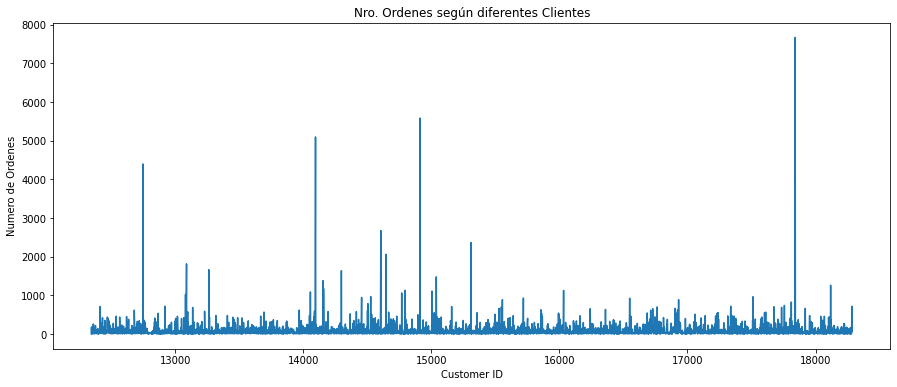

In [195]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customer ID')
plt.ylabel('Numero de Ordenes')
plt.title('Nro. Ordenes según diferentes Clientes')
plt.show()

Podemos ver que hay un grupo pequeño de personas que realizaron una gran cantidad de compras! Demosle otras vueltas a esta info

In [207]:
orders_monthyear = df_trabajo.groupby('InvoiceNo')['yearmonth'].unique().value_counts()

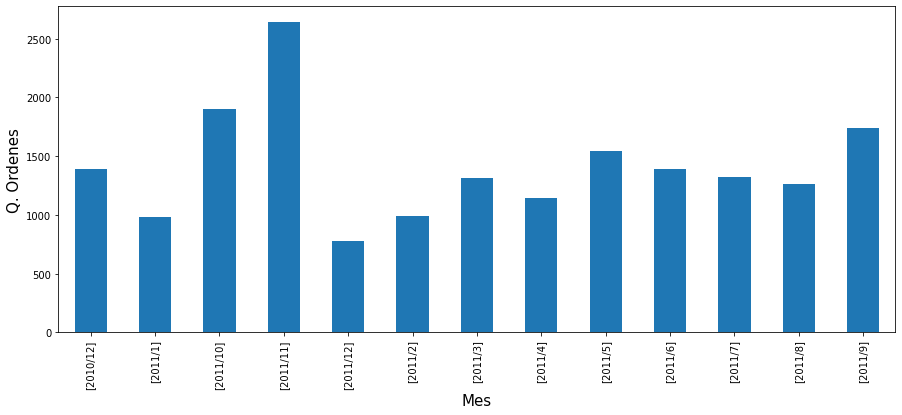

In [225]:
ax = df_trabajo.groupby('InvoiceNo')['yearmonth'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Mes',fontsize=15)
ax.set_ylabel('Q. Ordenes',fontsize=15)
plt.show()



Veamos por Paises

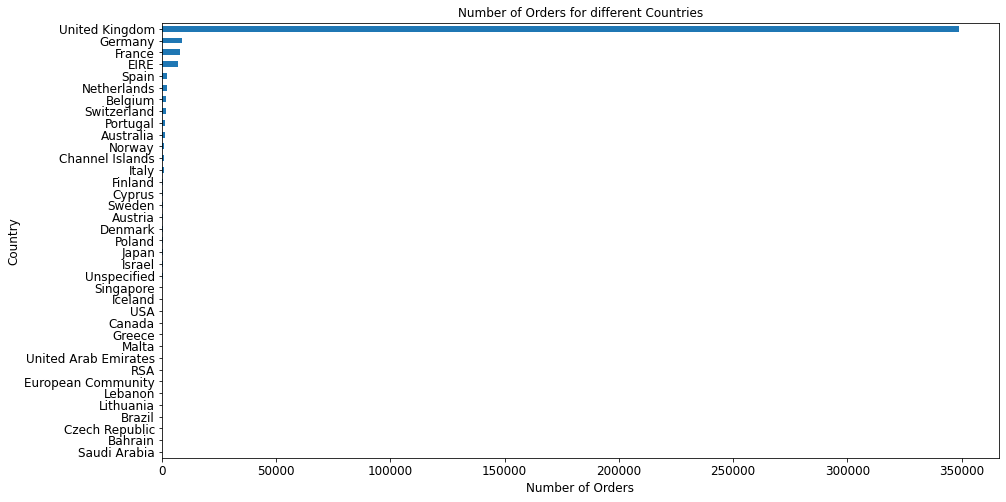

In [227]:
orders_by_country = df_trabajo.groupby('Country')['InvoiceNo'].count().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
orders_by_country.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

Patrón marcado, pero veamoslo un poco mas bonito porque no se aprecia bien que tan extensas son las operaciones de la empresa que estamos revisando


In [230]:
temp = df_trabajo[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
data = dict(type='choropleth',
locations = countries.index,
locationmode = 'country names', z = countries,
text = countries.index, colorbar = {'title':'Q. Ordenes'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)
#_______________________
layout = dict(title='Ordenes por País',
geo = dict(showframe = True, projection={'type':'mercator'}))
#______________
choromap = go.Figure(data = [data], layout = layout)

choromap.show()


El patrón es UK y si bien es una info relevante, quizá nos conviene ver como se distribuyen los paises sin contar a UK

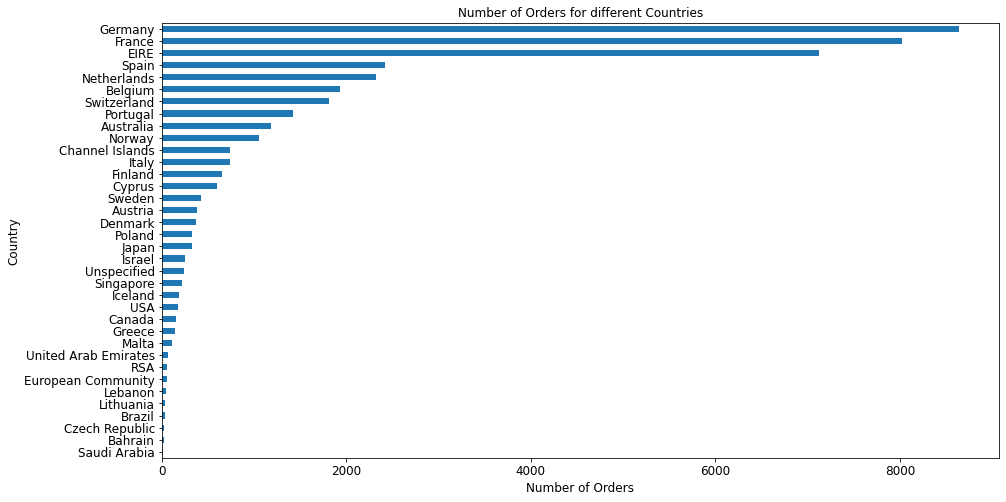

In [231]:
orders_by_country = df_trabajo.groupby('Country')['InvoiceNo'].count().sort_values()
del orders_by_country['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
orders_by_country.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

In [232]:
temp = df_trabajo[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
del countries['United Kingdom']
data = dict(type='choropleth',
locations = countries.index,
locationmode = 'country names', z = countries,
text = countries.index, colorbar = {'title':'Q. Ordenes'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)
#_______________________
layout = dict(title='Ordenes por País',
geo = dict(showframe = True, projection={'type':'mercator'}))
#______________
choromap = go.Figure(data = [data], layout = layout)

choromap.show()

Veamos que pasa con el StockCode y los productos vendidos, para eso agregamos una nueva variable, CantidadGastada que estará en dolares

In [233]:
df_trabajo['CantidadGastada'] = df_trabajo.Quantity*df_trabajo.UnitPrice

Cuanto gastan los países?

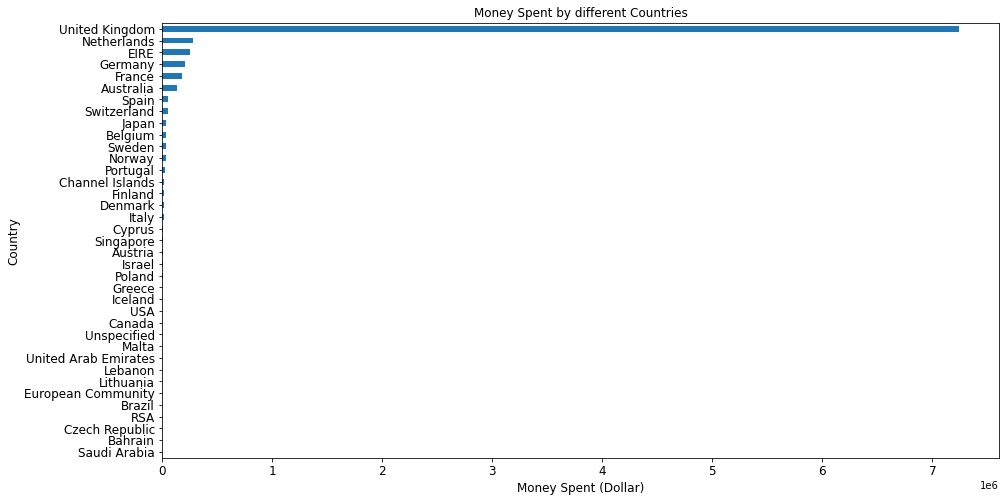

In [236]:
group_country_amount_spent = df_trabajo.groupby('Country')['CantidadGastada'].sum().sort_values()

plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

Nuevamente UK tiene mucho gasto, consideremos el gasto sin UK

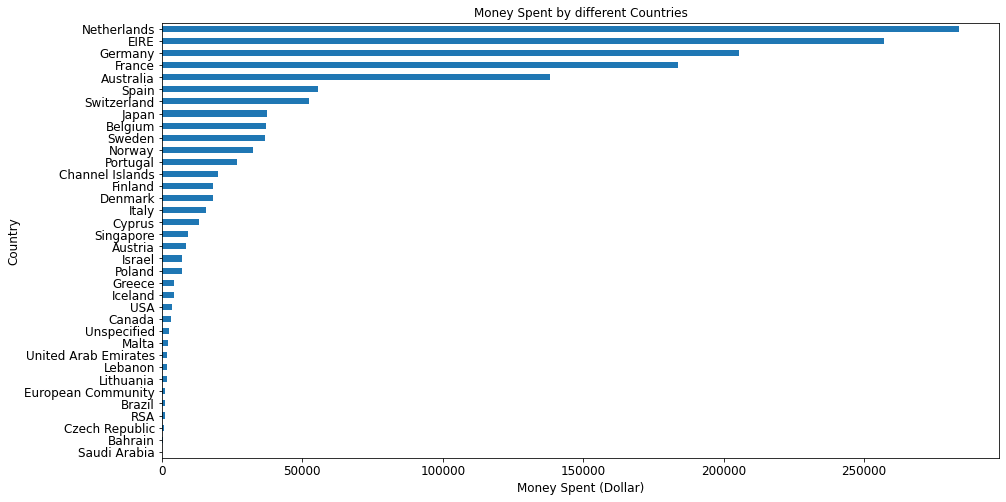

In [239]:
group_country_amount_spent = df_trabajo.groupby('Country')['CantidadGastada'].sum().sort_values()
del group_country_amount_spent['United Kingdom']


plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

Esto es nuevo, si bien Netherlands no es el pais con mas cantidades unicas, si es el pais que mayor cantidad de dinero gasta en la tienda(ademas de UK)

Analicemos ahora los productos:

In [241]:
prod_mas_vendidos = df_trabajo.groupby(by = ['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending = False).iloc[:50]

In [242]:
prod_mas_vendidos

StockCode  Description                        
23843      PAPER CRAFT , LITTLE BIRDIE            80995
23166      MEDIUM CERAMIC TOP STORAGE JAR         77916
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS      54319
85099B     JUMBO BAG RED RETROSPOT                46078
85123A     WHITE HANGING HEART T-LIGHT HOLDER     36706
84879      ASSORTED COLOUR BIRD ORNAMENT          35263
21212      PACK OF 72 RETROSPOT CAKE CASES        33670
22197      POPCORN HOLDER                         30919
23084      RABBIT NIGHT LIGHT                     27153
22492      MINI PAINT SET VINTAGE                 26076
22616      PACK OF 12 LONDON TISSUES              25329
21977      PACK OF 60 PINK PAISLEY CAKE CASES     24230
17003      BROCADE RING PURSE                     22927
22178      VICTORIAN GLASS HANGING T-LIGHT        22404
15036      ASSORTED COLOURS SILK FAN              21876
21915      RED  HARMONICA IN BOX                  20945
22386      JUMBO BAG PINK POLKADOT                20148
2

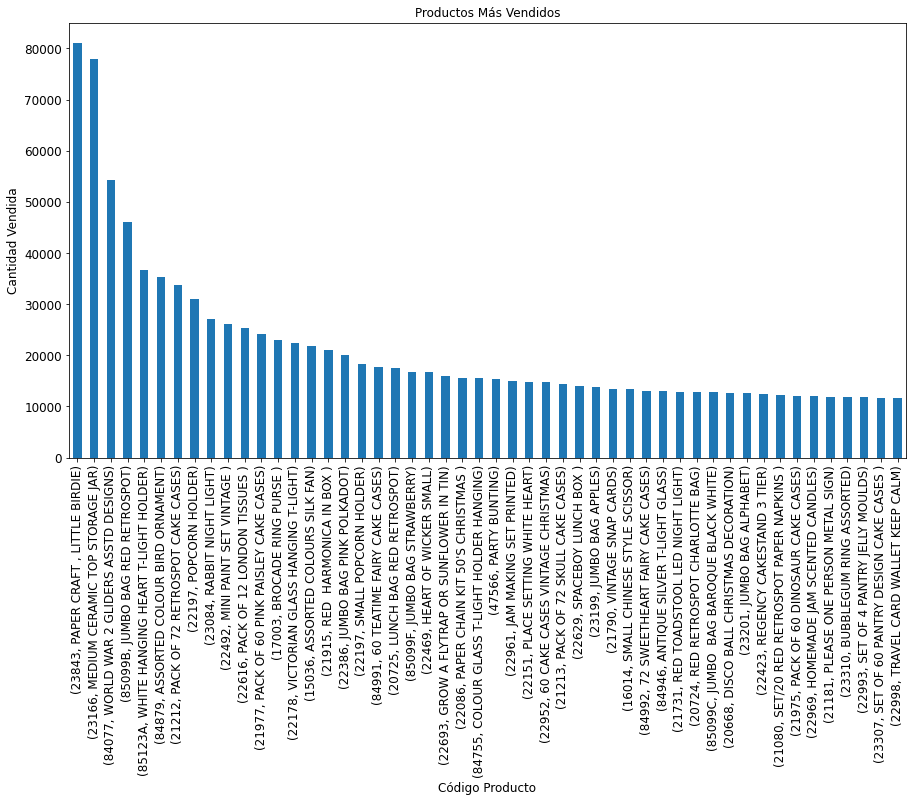

In [244]:
plt.subplots(figsize=(15,8))
prod_mas_vendidos.plot(kind='bar', fontsize=12)
plt.xlabel('Código Producto', fontsize=12)
plt.ylabel('Cantidad Vendida', fontsize=12)
plt.title('Productos Más Vendidos', fontsize=12)
plt.show()

Son estos productos los que nos entregan mayores ganancias?

In [248]:
prod_mayor_ganacia = df_trabajo.groupby(by = ['StockCode', 'Description'])['CantidadGastada'].sum().sort_values(ascending = False).iloc[:50]

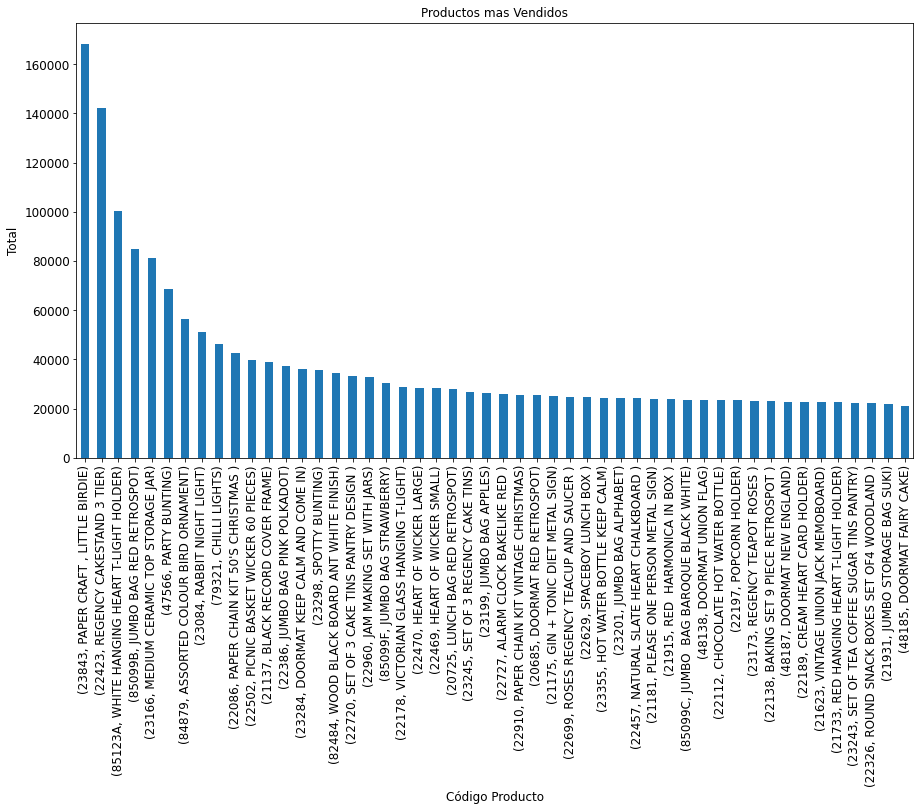

In [249]:
plt.subplots(figsize=(15,8))
prod_mayor_ganacia.plot(kind='bar', fontsize=12)
plt.xlabel('Código Producto', fontsize=12)
plt.ylabel('Total', fontsize=12)
plt.title('Productos mas Vendidos', fontsize=12)
plt.show()

Podríamos hacer un análisis de series de tiempo para los productos más vendidos, pero eso vendría para otro tipo de proyecto(o quizá para este mismo). Ahora debemos adentrarnos en el análisis de RFM para segmentación de clientes.

### RFM

- Recency: Cantidad de días desde la última transacción, ¿Cuando fue la última vez que compraron?
- Frequency: Número de transacciones, ¿Compran regularmente en la tienda? 
- Monetary: Ingresos generados, ¿Cuanto gastaron?

Crearemos las tablas de Recency, Frequency, Monetary y la combinación de las tres anteriores:

1. Para la tabla de Recency debemos establecer una fecha actual, que en nuestro caso será la última transaccion guardada en nuestros datos

In [251]:
import datetime as dt
now = dt.datetime(df_trabajo.iloc[-1].year,df_trabajo.iloc[-1].month, df_trabajo.iloc[-1].day)

In [272]:
recency_df = df_trabajo.groupby(['CustomerID'], as_index=False)['InvoiceDate'].max()
recency_df['CustomerID']=recency_df['CustomerID'].astype(int).astype(str)
recency_df.columns=['CustomerID', 'UltimaCompra']
recency_df['Recency'] = recency_df.UltimaCompra.apply(lambda x: (now-x).days)
recency_df.drop(columns=['UltimaCompra'], inplace=True)

In [273]:
recency_df.head()

,CustomerID,Recency
0,12346,324
1,12347,1
2,12348,74
3,12349,17
4,12350,309


Frecuency: Esto mas o menos ya lo habíamos calculado, pero podemos dejarlo aun mas claro con la tabla siguiente

In [261]:
frecuency_df = df_trabajo.copy()
frecuency_df.drop_duplicates(subset = ['CustomerID', 'InvoiceNo'], keep = 'first', inplace = True)
frecuency_df = frecuency_df.groupby('CustomerID', as_index=False)['InvoiceNo'].count()
frecuency_df.columns = ['CustomerID', 'Frecuency']


In [263]:
frecuency_df['CustomerID'] = frecuency_df.CustomerID.astype(int).astype(str)
frecuency_df.head()

,CustomerID,Frecuency
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1


Monetary: Q. Vendidas * Precio Unitario, esto ya lo habíamos calculado y estaba bajo la categoría de Cantidad Gastada

In [275]:
monetary_df = df_trabajo.groupby(by = ['CustomerID'], as_index=False)['CantidadGastada'].sum()
monetary_df['CustomerID'] = monetary_df.CustomerID.astype(int).astype(str)
monetary_df.columns = ['CustomerID', 'Monetary']

In [270]:
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1437.24
3,12349.0,1457.55
4,12350.0,294.40


Última tabla, la unión de las tres tablas anteriores dejando como índice nuestro CustomerID(esto último es muy importante para el proceso de clasificación)

In [276]:
rf = recency_df.merge(frecuency_df, left_on='CustomerID', right_on='CustomerID')
rfm = rf.merge(monetary_df, left_on = 'CustomerID', right_on = 'CustomerID')
rfm.set_index('CustomerID', inplace = True)
rfm.head()

,Recency,Frecuency,Monetary
CustomerID,,,
12346,324,1,77183.60
12347,1,7,4310.00
12348,74,4,1437.24
12349,17,1,1457.55
12350,309,1,294.40


Con esto podemos seguir de varias formas. Lo natural es segmentar por percentiles(en particular cuartiles) y generar 4 clases de clientes, otra alternativa natural sería aplicar técnicas de clusterización para generar nuestras clases. Intentarémos ambas.

### Cuartiles para segmentación dada la tabla de RFM

In [277]:
### Cuartiles para segmentación dada la tabla de RFM

In [300]:
qtiles = rfm.quantile(q=[0.25,0.5,0.75]).to_dict()

Creamos nuestro Score para Recency y Frecuency y Monetary por separado que luego le aplicaremos a cada uno de los valores en la tabla de RFM

In [301]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [302]:
RFMqtile = rfm.copy()
RFMqtile['r_quartile'] = RFMqtile['Recency'].apply(RScore, args=('Recency',qtiles,)).astype(str)
RFMqtile['f_quartile'] = RFMqtile['Frecuency'].apply(FMScore, args=('Frecuency',qtiles,)).astype(str)
RFMqtile['m_quartile'] = RFMqtile['Monetary'].apply(FMScore, args=('Monetary',qtiles,)).astype(str)
RFMqtile.head()

,Recency,Frecuency,Monetary,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346,324,1,77183.60,1,1,4
12347,1,7,4310.00,4,4,4
12348,74,4,1437.24,2,3,3
12349,17,1,1457.55,3,1,3
12350,309,1,294.40,1,1,1


In [303]:
RFMqtile['RFMScore'] = RFMqtile.r_quartile+RFMqtile.f_quartile+RFMqtile.m_quartile


In [304]:
RFMqtile.head()

,Recency,Frecuency,Monetary,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
12346,324,1,77183.60,1,1,4,114
12347,1,7,4310.00,4,4,4,444
12348,74,4,1437.24,2,3,3,233
12349,17,1,1457.55,3,1,3,313
12350,309,1,294.40,1,1,1,111


Aquí obtenemos nuestra tabla final de segmentación RFM por medio de cuartiles. Ahora es necesario asignarle categorías. Como referencia sabemos que 4,4,4 Es el mejor score porque significa que es un cliente muy reciente, muy frecuente y que gasta mucho.  

In [305]:
print("Mejores Clientes: ",len(RFMqtile[RFMqtile['RFMScore']=='444']))
print('Clientes Leales: ',len(RFMqtile[RFMqtile['f_quartile']=='4']))
print("Clientes que Gastan: ",len(RFMqtile[RFMqtile['m_quartile']=='4']))
print('Clientes por Perder:', len(RFMqtile[RFMqtile['RFMScore']=='121']))
print('Clientes Perdidos: ',len(RFMqtile[RFMqtile['RFMScore']=='211']))
print('Malos Clientes: ',len(RFMqtile[RFMqtile['RFMScore']=='111']))

Mejores Clientes:  458
Clientes Leales:  865
Clientes que Gastan:  1084
Clientes por Perder: 59
Clientes Perdidos:  212
Malos Clientes:  445


Se puede profundizar en cada una de las clases de cliente identificando por ejemplo los productos mas comprados, de donde vienen estos clientes, los meses y días donde mas compran, etc...  De tal forma de dar un trato dirigido, pero eso es mejor hacerlo cuando tenemos modelos mas acabados para minimizar nuestro error.

### Segmentación por Clusters

In [309]:
RFMcluster = RFMqtile.drop(columns=['r_quartile', 'f_quartile','m_quartile', 'RFMScore'], axis = 1)

In [310]:
RFMcluster

,Recency,Frecuency,Monetary
CustomerID,,,
12346,324,1,77183.60
12347,1,7,4310.00
12348,74,4,1437.24
12349,17,1,1457.55
12350,309,1,294.40
...,...,...,...
18280,276,1,180.60
18281,179,1,80.82
18282,6,2,178.05


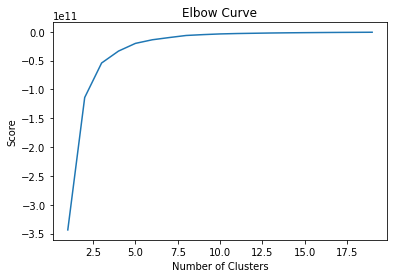

In [311]:
from sklearn.cluster import KMeans

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(RFMqtile).score(RFMqtile) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [312]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(RFMcluster)

In [313]:
RFMcluster['cluster'] = kmeans.labels_

C:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='cluster', ylabel='Recency'>

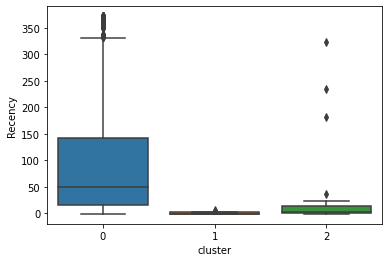

In [314]:
import seaborn as sns
sns.boxplot(RFMcluster.cluster,RFMcluster.Recency)

C:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='cluster', ylabel='Frecuency'>

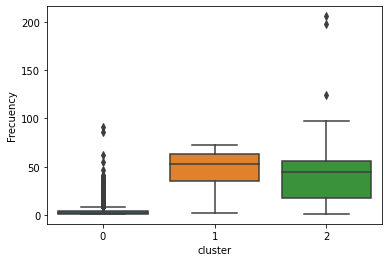

In [317]:
sns.boxplot(RFMcluster.cluster,RFMcluster.Frecuency)

C:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='cluster', ylabel='Monetary'>

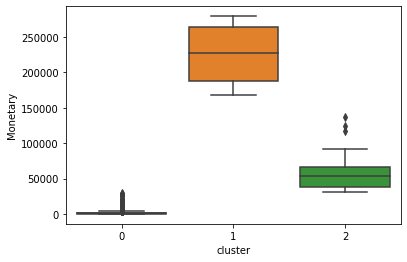

In [316]:
sns.boxplot(RFMcluster.cluster,RFMcluster.Monetary)